# Uke 2: Det riktige diagrammet for jobben

I dette notatboken skal vi utforske hvordan du kan tilpasse datavisualiseringer ved hjelp av [`Vega-Altair`](https://altair-viz.github.io/). Vi introduserte [Altair](https://altair-viz.github.io/) for første gang i [DIGI118 Modul 1: Heisann, Altair!](https://www.kaggle.com/code/lauragarrison/digi118-modul-1-heisann-altair). Det er et *deklarativt* statistisk visualiseringsbibliotek for Python som lar deg raskt spesifisere *data, grafiske merker* og *kodingskanaler* i visualiseringen din. Det er basert på [Vega-Lite](https://vega.github.io/vega-lite/), en høynivågrammatikk for interaktiv grafikk. 

Altairs mål er å konfigurere plott automatisk, slik at vi kan tenke på dataene i stedet for på plottmekanikken. Når det er sagt, er det likevel rom for å tilpasse aspekter ved visualiseringen du produserer. Ved slutten av denne modulen skal du være i stand til å
- Forstå hva det vil si å tilpasse visualiseringer på de tre ulike nivåene: koding, lokalt og globalt
- Tilpasse diagramtekst, for eksempel akseetiketter, tittel og beskrivelse (tittel du lært om i forrige uken)
- Legge til en tegnforklaring (legend) i diagrammet
- Tilpasse fargeskalaen og merker
- Tilpasse størrelsen på diagrammer 
- Opprett sammensatte diagrammer

**La oss komme i gang!**

---

### Lag først en kopi av denne notatboken ved hjelp av knappen øverst til høyre i dette vinduet. 
Nå er du klar til å kjører koden i din egen versjon av denne notatboken.

# 1. Importerer
Vi vil igjen importere de nødvendige bibliotekene for å bruke deres funksjoner med mer: `pandas`for datarammer og `altair` for visualisering. 

In [ ]:
import pandas as pd
import altair as alt

La oss også lese inn [Titanic dataset](https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates) som vi vil bruke som input i denne notatboken.

In [ ]:
titanic = pd.read_csv("../input/titanic-dataset-with-coordinates/titanic_coord.csv")

# 2. Tilpasning på kodings-, lokalt eller globalt nivå
Det finnes ofte tre forskjellige måter å tilpasse utseendet på plottene dine på: 
- **Global Config**(uration) virker på et helt `Chart()`-objekt
- **Local Config** virker på ett merke i diagrammet
- **Encoding**-kanaler kan også brukes til å angi noen diagramegenskaper

La oss se på hvordan disse tilnærmingene skiller seg fra hverandre. Anta at vi skal lage et spredningsdiagram over alder og billettpris for passasjerene i Titanic-datasettet. Slik vil diagrammet se ut som standard.

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"), # or x="Age:Q"
    alt.Y("Fare:Q") # or y="Fare:Q"
)

## 2a. Global konfigurasjon

**Anta at vi ønsker å endre fargen på punktene/merkene til lilla og opaciteten til 20 %**.

Først kan vi tilpasse på **globalt eller øverste nivå** i diagrammet gjennom egenskapen `config`, som fungerer som et tema for hele diagrammet og alle underdiagrammene. Vi kan bruke `configure_*`-metoder til å justere mange forskjellige egenskaper ved diagrammet, f.eks:
- akser ved hjelp av `configure_axis()`
- merker ved hjelp av `configure_marks()`
- interaktive valg ved hjelp av `configure_selection()`
- [og flere konfigurasjoner på toppnivå](https://altair-viz.github.io/user_guide/configuration.html)

Det er to viktige ting å være oppmerksom på når det gjelder globale tilpasninger:
1. Global konfigurasjon påvirker *alle egenskaper* (akse, merke, utvalg osv.) i diagrammet. Hvis diagrammet er et sammensatt diagram (et diagram som kombinerer flere diagrammer), **vil alle egenskapene til underdiagrammene også bli tilpasset**.
2. Global konfigurasjon er bare tillatt på toppnivå. Hvis vi prøver å legge et globalt konfigurert diagram i lag eller kombinere det med et annet diagram, vil det føre til en feilmelding. 

Her bruker vi metoden `configure_mark` til å endre farge og opasitet på punktene våre. For å bruke metoden kjeder vi den etter Chart-objektet vårt.

*OBS: Vi kan referere til farger ved hjelp av navn, hex-kode eller RGB-verdi. Moderne nettlesere støtter [140 navngitte farger](https://htmlcolorcodes.com/color-names/).*

In [ ]:
titanic_viz = alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
)

titanic_viz.configure_mark(
    color="purple",
    opacity=0.2
)

## 2b. Lokal konfigurasjon

Vi kan også konfigurere utseendet til punktmarkeringene lokalt. Dette betyr at konfigurasjonen bare påvirker en bestemt diagramegenskap som vi velger, i stedet for egenskapen i alle diagrammer og underdiagrammer.

Det er også viktige ting å være oppmerksom på ved lokal konfigurasjon:
1. Lokale konfigurasjoner vil alltid overstyre globale konfigurasjoner.
2. I motsetning til global konfigurasjon er det mulig å legge et lokalt konfigurert diagram i lag eller kombinere det med et annet diagram.

For merkeegenskaper er den beste måten å spesifisere tilpasningen vår som et argument i metoden `mark_*`. I tilfellet med `mark_points()`:

In [ ]:
alt.Chart(titanic).mark_circle(
    color="purple", 
    opacity=0.2
).encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
)

## 2c. Koding
Til slutt kan vi tilpasse diagramegenskapene ved hjelp av kanalen [koding](https://altair-viz.github.io/user_guide/encodings/index.html#user-guide-encoding) (på engelsk: "encoding"). 

Viktige ting å være oppmerksom på med kodingskonfigurasjoner:
1. Kodingskonfigurasjoner vil alltid overstyre lokale og globale konfigurasjoner
2. Akkurat som med lokale konfigurasjoner er det mulig å legge diagrammer i lag eller kombinere diagrammer med kodingskonfigurasjoner.
3. Bare et begrenset sett med egenskaper kan knyttes til kodinger

Så langt har vi tilordnet en diagramegenskap (for eksempel y- og x-aksen) til en datakolonne (for eksempel `Age` eller `Fare`). Det er også mulig å tilordne en egenskap direkte til en verdi ved hjelp av Altairs [`value()`-funksjon](https://altair-viz.github.io/user_guide/generated/api/altair.value.html). Her tilordner vi farge og opasitet til spesifikke verdier:

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    color=alt.value("purple"),
    opacity=alt.value(0.2)
)

## 2d. Hvilket konfigurasjonsnivå skal jeg bruke?
Som du leste ovenfor, har **koding**-konfigurasjoner høyest prioritet, etterfulgt av **lokale**-konfigurasjoner, og til slutt **globale**-konfigurasjoner. 

Siden konfigurasjonen med høyest prioritet alltid vil overstyre konfigurasjonene under, anbefales det å bruke en **koding**-konfigurasjon (eller en lokal konfigurasjon for diagramegenskaper som ikke er bundet til kodinger). Globale konfigurasjoner bør bare brukes til å lage temaer som brukes rett før det endelige diagrammet gjengis. Den gir sikkert mer mening over neste ukene når vi begynner å sette alle diagrammene våre sammen. 

---
## 2e. Prøv deg selv! 📝
Lag et diagram etter eget valg av Titanic-datasettet, og prøv å tilpasse fargen og opasiteten til merkene ved hjelp av de tre ulike konfigurasjonsnivåene.

Her er en tom mal for et Chart-objekt som en start:
```
alt.Chart(    ).mark_   ().encode(
    alt.X(   ),
    alt.Y(   )
)
```

In [ ]:
# YOUR CODE HERE

---
# 3. Diagramtekst
Nå skal vi se på de ulike måtene vi kan tilpasse teksten i diagrammene våre på. Vi skal se nærmere på diagramtitler, beskrivelser og akseetiketter.
## 3a. Akseetiketter
Altair gir oss verktøy for å enkelt konfigurere utseendet på akseetikettene. Etter at vi har tilordnet en y- eller x-akse til en datakolonne, kan vi kjede metoder for å tilpasse akse- og avkryssingsetikettene.

Vi kan for eksempel formatere akseetikettene ved å kjede `title`-metoden etter kodingen.

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q").title("Age, in years"),
    alt.Y("Fare:Q").title("Passenger fare, in pounds")
)

Vi kan også fjerne akseetikettene ved å angi verdien `None`.

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q").title(None),
    alt.Y("Fare:Q").title(None)
)

Eller vi kan fjerne merkelappene i stedet. Dette kan gjøres ved å kjede sammen `axis`-metoden og sette `labels`-parameteren til `False`.

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q").axis(labels=False),
    alt.Y("Fare:Q").axis(labels=False)
)

Til slutt kan vi også rotere akseetikettene slik at de ligger på toppen av diagrammet. Dette er litt mer komplisert og kan spesifiseres ved hjelp av parametere i metoden `axis`. 

Du kan lese mer om denne metodens ekstremt lange liste over parametere (egenskaper som kan endres) i [Altair-dokumentasjonen](https://altair-viz.github.io/user_guide/generated/core/altair.Axis.html). Nedenfor kan du se at vi har flytten y-akseetiketen til toppen av y-aksen, og roteres horisontalt:

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q").axis(
        title="Passenger fare, in pounds", # and so, you can also specify axis labels in axis()
        titleAngle=0, #angle/tilt
        titleAlign="left", #alignment with edge of chart
        titleY=-10, #vertical space in pixels between title and edge of chart
        titleX=-25 #horizontal space in pixels between title and edge of chart
    )
)

## 3b. Diagramtitler og beskrivelser
La oss nå se på hvordan du kan tilpasse tittelen og beskrivelsen av diagrammet. I [Modul 1](https://www.kaggle.com/code/lauragarrison/digi118-modul-1-heisann-altair) lærte vi hvordan vi kan spesifisere denne typen diagramtekst ved hjelp av Altairs `Title`-funksjon:

In [ ]:
# Specify chart title and description
chart_title = alt.Title(
    "Age and fare distribution on the Titanic",
    subtitle="The fare of a passenger was not dependent on age"
)

# Draw the Chart object with the specified title
alt.Chart(titanic, title=chart_title).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
)

Hva om vi ønsker å tilpasse **skrifttyper, skriftstørrelser, skriftfarger og plassering** av tittel og beskrivelse? Vi kan konfigurere dette både på lokalt og globalt nivå. 

For **lokal konfigurasjon** kan vi bruke funksjonen [`TitleParams`](https://altair-viz.github.io/user_guide/generated/core/altair.TitleParams.html), som spesifiserer et større utvalg av tekstegenskaper enn `Title`. Du kan lese mer om alle parametrene (egenskaper som kan endres) i [Altair documentation](https://altair-viz.github.io/user_guide/generated/core/altair.TitleParams.html).

*OBS: Her finner du [en liste over mulige skrifter](https://www.tutorialspoint.com/html/html_fonts_reference.htm) du kan bruke (alle skrifter som kan brukes i HTML).*

Du kan også være inspirert av verktøy på nettet som [BBC Visual and Data Journalism Cookbook](https://bbc.github.io/rcookbook/)--programmeringspråk av den er `R`, men mange av de samme elementer sammenlignes mellom den og notatboken her. 



In [ ]:
# Use TitleParams instead to specify chart title and other properties
chart_title = alt.TitleParams(
    "Age and fare distribution on the Titanic",
    subtitle="The fare of a passenger was not dependent on age",
    font="Helvetica", # specifies font for the title
    fontWeight="bold",
    subtitleFont="Helvetica",  # specifies font for the description
    color="black",
    subtitleColor="grey",
    fontSize=28,
    subtitleFontSize=22,
    anchor="start", # specifies position for placing the title (middle by default, or start, end)
    orient="bottom", # specifies title orientation around chart (top by default, or bottom, left, right)
    offset=20 #space in pixels between title and chart  
)

# Draw the Chart object and specify the title locally
alt.Chart(titanic, title=chart_title).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
)

For **global konfigurasjon** kan vi bruke en av konfigurasjonsmetodene, [`configure_title`](https://altair-viz.github.io/user_guide/configuration.html#config-title), til å endre skrifttype, farge, plassering og retning på en diagramtittel som allerede er spesifisert. Du kan gjøre like mange tilpasninger som med `TitleParams`. Du kan lese mer om denne metoden og andre konfigurasjonsmetoder på toppnivå i [Altair documentation](https://altair-viz.github.io/user_guide/configuration.html).

In [ ]:
# Specify chart title and description
chart_title = alt.Title(
    "Age and fare distribution on the Titanic",
    subtitle="The fare of a passenger was not dependent on age"
)

# Draw the Chart object and customize the title globally using configure_title
alt.Chart(titanic, title=chart_title).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
).configure_title(
    font='Helvetica',
    fontWeight="bold",
    subtitleFont="Helvetica",
    color="black",
    subtitleColor="grey",
    fontSize=28,
    subtitleFontSize=22,
    anchor="start", 
    orient="bottom", 
    offset=20 
)

Vi kan *også* angi en tittel ved hjelp av metoden `properties` og endre den med `configure_title`. Denne metoden tillater oss imidlertid **ikke** å spesifisere en undertittel. Det er trygt å si at det finnes mange måter å organisere kode på, og hver tilnærming har ulike prioritet, parametere og tillatelser. 

Vi skal se nærmere på `properties`-metoden senere i notatboken, når vi endrer størrelsen på diagrammet.

In [ ]:
# Draw the Chart object, specify a title using properties, and customize a title globally using configure_title
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
).properties(
    title="Age and fare distribution on the Titanic"
).configure_title(
    font='Helvetica',
    fontWeight='bold',
    color="black",
    fontSize=28,
    anchor="start", 
    orient="bottom", 
    offset=20 
)

---
## 3c. Prøv deg selv! 📝
Prøv å tilpasse diagramteksten etter eget ønske. 
Bruk eksemplene ovenfor og all relatert Altair-dokumentasjon for å lage et diagram med:
- lilla diagramtittel
- kursiv undertittel på diagrammet
- diagramtittelstørrelse på 20 piksler og undertittelstørrelse på 12 piksler
- undertittel med flere linjer med tekst (**tips**: det finnes i denne [hjelpeguiden](https://altair-viz.github.io/user_guide/customization.html#adjusting-the-title))
- diagram med egendefinerte akseetiketter og ingen kryssetiketter

In [ ]:
# YOUR CODE HERE

---
# 4. Tegnforklaring 
Tegnforklaringer kan betraktes som en annen form for diagramtekst som hjelper betrakteren med å forstå hvordan visualiseringskodingen skal leses. En tegnforklaring opprettes automatisk når `farge`-, `form`- eller `størrelse`-kanaler tilordnes en datakolonne.

La oss se på Titanic-visualiseringen igjen. Denne gangen tilordner vi `alt.Color()` til passasjerklassen. Vi ser at det er lagt til en tegnforklaring til høyre i diagrammet, og at de ulike klassene automatisk har fått forskjellige farger.


In [ ]:
# Note how we do not use alt.value() when mapping color to a data column
alt.Chart(titanic).mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    alt.Color("Pclass:O") # or color="Pclass:O". 
)

I dette eksempelet ser vi at det er viktig å spesifisere datatypen når en kanal skal mappes til en numerisk datakolonne. I diagrammet ovenfor har vi fortalt Altair at passasjerklasser er ordinaldata; vi vet at det finnes tre ordnede kategorier av klasser - første, andre og tredje klasse. 

Hvis vi ikke angir datatypen selv, vil Altair utlede at datatypen er kvantitativ (kjøring av `titanic.info()` vil vise at passasjerklassene for øyeblikket er skrevet som heltall). 

**Ta vekk `:O` fra overst og se forskjellen deg selv**: Dette endrer hvordan fargene tilordnes dataene. Nå har passasjerklassene fått en kontinuerlig fargeskala i stedet for en diskret sekvensiell fargeskala. Dette er selvfølgelig en feilaktig fremstilling, ettersom passasjerklasser ikke er kontinuerlige verdier.


Vi kan også annotere passasjerklassen som nominelle data, hvis vi ønsker at Altair skal differensiere fargen på de tre klassene ytterligere. Altair vil bruke et ikke-sekvensielt fargeskjema som normalt brukes for uordnede, kategoriske data.


In [ ]:
alt.Chart(titanic).mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    alt.Color("Pclass:N"), # or color="Pclass:N"
)

La oss foreløpig holde oss til den nominelle fargetilordningen og prøve å tilordne en `shape`-kanal til passasjerens overlevelse. Vi ser at forklaringen utvides til å omfatte disse formkodingene.


In [ ]:
alt.Chart(titanic).mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    alt.Color("Pclass:N"), # or color="Pclass:N". 
    alt.Shape("Survived:N") # or shape="Survived:N" Requires mark_point
)

`Pclass` er en ganske vag forklaring for noe som ikke er kjent med datasettet. Vi kan endre navn til *Passenger Class* ved hjelp av `title`-metoden, på samme måte som vi omdøpte titlene på x- og y-aksen.


In [ ]:
alt.Chart(titanic).mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    alt.Color("Pclass:N").title("Passenger Class"),
    alt.Shape("Survived:N")
)

Det er også ganske uklart hva `0` og `1` under `Survived` betyr hvis man ikke er kjent med datasettet (eller binære tall). 

Det finnes ingen enkel måte å «omdøpe» og endre disse dataværdiene gjennom Altair, siden det først og fremst er et visualiseringsbibliotek. Hvis vi ønsker å manipulere dataene, kan vi i stedet bruke `pandas` til å erstatte verdier i vår titaniske dataramme.


In [ ]:
# Making a copy of the titanic dataframe to preserve the original one
titanic_copy = titanic.copy()

# Replace integers in the Survived data column with strings
titanic_copy["Survived"] = titanic_copy["Survived"].replace(0, 'No')
titanic_copy["Survived"] = titanic_copy["Survived"].replace(1, 'Yes')

# Draw chart
alt.Chart(titanic_copy).mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    alt.Color("Pclass:N").title("Passenger Class"),
    alt.Shape("Survived:N")
)

---
## 4c. Prøv deg selv! 📝
Det finnes andre måter å tilpasse en tegnforklaring på enn fargeskalaer og etiketter, for eksempel ved å endre plassering og posisjon i nærheten av diagrammet. Opprett et diagram etter eget valg og prøv å bruke Altair-dokumentasjonen til å
- fjerne tegnforklaringen helt
- flytte tegnforklaringen til toppen av diagrammet

In [ ]:
# YOUR CODE HERE

---
# 5. Fargeskalaer og merkestørrelsen
Som vi har sett i avsnittene ovenfor, er det mulig å tilpasse farger for flere diagramelementer.
- Fargen på diagrammets **tekst** kan spesifiseres både lokalt og globalt
- Fargen på **merker** kan spesifiseres på kodingsnivå, enten som en fast verdi (f.eks. `alt.value("red")`) eller tilordnet til en datakolonne (f.eks. `alt.Color("Pclass")`).
- Når du bruker farge som en kodingskanal**, avhenger fargeskalaen av datatypen (nominell, ordinal, kvantitativ).

Som du kanskje skjønner, er det mulig å tilpasse disse fargeskalaene. Altair inkluderer [et sett med navngitte fargeskjemaer](https://vega.github.io/vega/docs/schemes/) for både kategoriske og sekvensielle data, definert av Vega-prosjektet. Vi kan sende navnene på fargeskjemaene inn i `scheme`-argumentet til `scale`-metoden for å endre fargene på merkene våre.


In [ ]:
# Sequential multi-hue color scheme
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age"),
    alt.Y("Fare"),
    alt.Color("Pclass:O").scale(scheme="lightgreyred")
)

In [ ]:
# Categorical color scheme
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age"),
    alt.Y("Fare"),
    alt.Color("Pclass:N").scale(scheme="dark2")
)

### Merkestørrelsen
Hvis vi ønsker å endre størrelsen på merkene som plottes manuelt, kan vi igjen gjøre dette lokalt i metoden `mark_*`. I dette tilfellet krymper vi bredden på sirkelmerkene. Vi kan også endre bredden på søyler, punkter, linjer og andre merker.


In [ ]:
alt.Chart(titanic).mark_circle(size=10).encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
)

Om vi i stedet vil bruke størrelsen å si noen om dataene våre, må vi kode den i `encode()` metoden. Her bruker vi også metoden `sort()` til å ordne størrelseskodingene våre på en bestemt måte (minst til størst fra 1 til 3).

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q"),
    alt.Size("Pclass:N").sort("ascending") #try "descending" sort
)

# 6. Størrelsen på diagrammet
Vi skal også se på hvordan du kan tilpasse størrelsen på diagrammet og merkene. Dette er noe annet enn å mappe kanalen `size`, som gjør størrelsen på merkene avhengig av dataværdier.

Tidligere i notatboken så vi på hvordan metoden `properties()` kan brukes til å spesifisere en diagramtittel. Nedenfor følger to eksempler som bruker denne metoden til å justere bredden og høyden på et diagram lokalt:


In [ ]:
# Here we are making a mini version of the default chart
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
).properties(
    width=200,
    height=150
)

In [ ]:
alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
).properties(
    width="container", #respond to the width of the HTML webpage
    height=150
)

# 7. Sammensatte diagrammer
I noen situasjoner ønsker vi å gjøre mer enn å tegne et diagramobjekt. Det kan være lurt å visualisere flere merker i ett diagram eller plassere flere diagrammer side om side. Disse klassene av visualiseringer kalles [**sammensatte diagrammer**](https://altair-viz.github.io/user_guide/compound_charts.html):
- **Layered charts** lar deg plassere flere merker i ett enkelt diagram.
- **Sammensatte diagrammer** lar deg sette flere diagrammer ved siden av hverandre
- **Facet-diagrammer**, eller små multipler, lar deg opprette flere visninger som viser delmengder av dataene. Vi dekke ikke disse i denne notatboken--de kommer i neste uken. 

I denne delen vil vi kort vise hvordan de første to sammensatte diagrammene kan opprettes med Altair. 


## 7a. Lagdelte diagrammer
I Altair kan vi legge diagrammer i lag oppå hverandre ved hjelp av enten metoden `alt.layer(chart1, chart2)` eller plussoperatoren `chart1 + chart2`. 

Jeg har for eksempel et spredningsdiagram som viser den individuelle fordelingen av alder og billettpriser blant passasjerene på Titanic, men jeg ønsker også å se et sammendrag av fordelingen, for eksempel den gjennomsnittlige billettprisen som ble betalt per års alder. Dette krever at vi plotter et nytt lag med merker på toppen av det opprinnelige spredningsdiagrammet.

Dette kan vi gjøre ved først å tegne hvert diagram for seg (ett med individuell fordeling og ett med oppsummerende statistikk) og lagre disse i separate variabler. Deretter utfører vi en plussoperasjon på variablene for å legge de to diagrammene i lag.

In [ ]:
#first chart
all_fare = alt.Chart(titanic).mark_circle().encode(
    alt.X("Age:Q"),
    alt.Y("Fare:Q")
)
all_fare

In [ ]:
#second chart
avg_fare = alt.Chart(titanic).mark_point().encode(
    alt.X("Age:Q"),
    alt.Y("median(Fare):Q"),
    color=alt.value("orange")
)
avg_fare

In [ ]:
# Create a compound chart, which can also be assigned to a variable
layered_fare = all_fare + avg_fare #or: alt.layer(all_fare, avg_fare)
layered_fare

Legg merke til at rekkefølgen du legger diagrammene i, er viktig. Det diagrammet som legges til sist, vises øverst i det sammensatte diagrammet.


In [ ]:
avg_fare + all_fare #reversed layer order 

## 7b. Sammenkjedede diagrammer
I Altair kan vi sammenkoble diagrammer enten vertikalt eller horisontalt. 

For å plassere diagrammer ved siden av hverandre horisontalt, kan vi enten bruke metoden `alt.hconcat(chart1, chart2)` eller linjeoperatoren `chart1 | chart2`.


In [ ]:
all_fare | avg_fare #or alt.hconcat(all_fare, avg_fare)

Og for å plassere diagrammer vertikalt ved siden av hverandre kan vi enten bruke metoden `alt.vconcat(chart1, chart2)` eller en ampersand-operator `chart1 & chart2`.


In [ ]:
all_fare & avg_fare #or alt.vconcat(all_fare, avg_fare)

# To do: Oppgave 1b
Din oppgave nå er å tilpasse den temporale visualiseringen fra Oppgave 1a og lage en annen tilpasset, lagdelt visualisering ved hjelp av [Bergen Bike Sharing Dataset](https://www.kaggle.com/datasets/amykzhang/bergen-bike-sharing-dataset-2023). Deretter kan du kombinere disse to diagrammene ved hjelp av metodene du har lært i denne notatboken! 

Lag en kopi av Kaggle-notatboken [DIGI118 Oppgave 1b - Blank](https://www.kaggle.com/code/amykzhang/digi118-oppgave-1b-blank) og fyll ut notatboken med din egen kode. Dette vil være den andre byggesteinen i dashbordvisualiseringen som du skal jobbe mot. 

**Lykke til med oppgaven og ta kontakt/kom gjerne til gruppetimen om du har spørsmål eller trenger hjelp!**

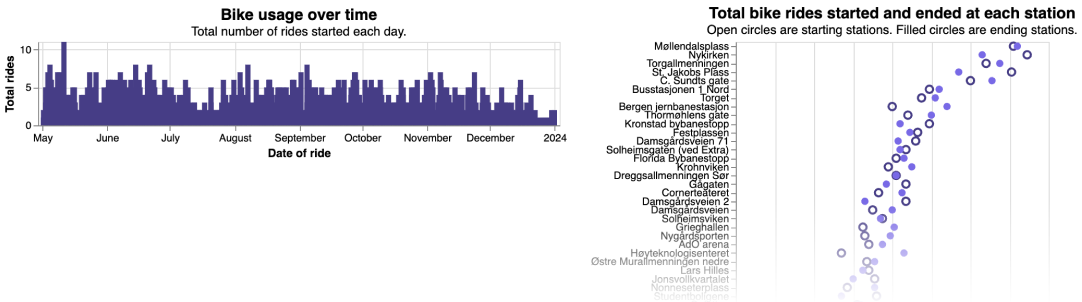


---
# Kilder

**Note:** Denne modulen er delvis basert på [Altair User Guide to Customizing Visualizations](https://altair-viz.github.io/user_guide/customization.html#customizing-visualizations)

**Datasett som brukes i denne modulen:** 
- Titanic Dataset with Coordinates: https://www.kaggle.com/datasets/amykzhang/titanic-dataset-with-coordinates
- Bergen Weather Data 2023: https://www.kaggle.com/datasets/amykzhang/bergen-weather-data-2023

---
By Ke Er Zhang and Laura Garrison. © Copyright 2024.